In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import csv

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) #pandas'ın tüm satır ve sütunları yazdırmasını istedik(görüntüde ... gibi boşluk döndürmesin)
pd.set_option('display.width', 500) #dframe'in maksimum genişlik ayarı

In [6]:
#ilk 10 satırı gösterir.
data = pd.read_csv("kadın_erkek_maaş_farkı.csv")  #Avrupa'da meslek türüne göre erkek ve kadınların arasındaki maaş farkını gösteren veriler üzerinde çalışıyoruz
data.head(10)

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,Construction,Retail trade,Transportation,Accommodation,Information,Financial,Real estate,Professional_scientific,Administrative,Public_administration,Education,Human_health,Arts,Other
0,Austria,2010,35390,57.40,24.0,25.2,18.3,24.4,23.6,12.2,9.9,27.5,7.3,9.9,21.2,30.3,27.0,34.0,22.5,NaN,27.8,12.0,34.0,32.0
1,Austria,2011,36300,57.12,23.5,24.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,2012,36390,57.15,22.9,24.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,2013,36180,57.34,22.3,23.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,2014,36130,57.53,22.2,23.8,15.9,23.0,19.8,10.0,8.2,23.4,10.6,7.4,22.9,30.4,27.8,31.5,19.5,NaN,24.3,12.8,26.6,28.8
5,Austria,2015,36140,57.72,21.8,23.4,13.7,22.7,17.6,9.3,8.2,23.3,11.6,6.4,22.4,30.3,28.0,31.3,20.0,NaN,24.2,12.9,26.2,28.3
6,Austria,2016,36390,57.91,20.8,22.3,14.4,21.9,13.2,8.2,8.3,23.3,14.5,5.9,20.9,27.1,28.7,30.4,17.8,NaN,24.3,14.5,20.8,27.8
7,Austria,2017,36980,58.09,20.7,22.3,10.9,21.7,13.0,8.4,8.3,23.2,12.4,5.7,20.6,28.4,29.0,29.4,17.4,NaN,23.7,15.0,19.1,26.9
8,Austria,2018,37690,58.30,20.4,22.0,7.9,21.4,14.4,8.1,8.3,23.2,11.7,5.4,20.7,28.2,29.2,28.3,17.1,NaN,23.6,15.3,18.3,26.4
9,Austria,2019,38090,58.52,19.9,21.6,8.0,20.9,13.6,8.3,8.2,22.7,11.9,4.9,20.3,28.0,28.4,27.5,16.8,NaN,23.4,14.9,17.4,25.7


In [7]:
data.tail(10)

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,Construction,Retail trade,Transportation,Accommodation,Information,Financial,Real estate,Professional_scientific,Administrative,Public_administration,Education,Human_health,Arts,Other
314,Switzerland,2012,58290,73.65,17.4,20.3,9.6,18.2,11.9,7.7,8.6,23.1,13.4,8.0,21.0,31.1,20.7,23.3,17.3,18.3,8.0,18.1,15.4,20.2
315,Switzerland,2013,58650,73.67,17.6,20.3,9.0,18.3,11.3,7.1,8.4,22.9,13.1,8.7,21.7,31.1,20.9,23.3,17.6,17.9,8.0,18.4,15.3,20.2
316,Switzerland,2014,59300,73.70,17.4,19.9,8.2,18.0,10.5,6.3,7.7,22.3,12.8,8.1,21.6,31.0,20.6,22.6,17.4,17.9,7.9,18.7,14.5,19.4
317,Switzerland,2015,59600,73.72,17.9,20.0,9.3,17.7,11.6,7.5,5.9,21.7,12.5,7.6,22.8,31.8,20.9,24.9,17.0,18.7,9.7,19.4,13.5,21.4
318,Switzerland,2016,60170,73.74,17.4,19.6,8.3,17.3,11.2,4.3,7.1,22.4,13.2,7.3,22.0,31.1,21.4,23.3,18.0,16.8,9.3,17.4,15.2,17.2
319,Switzerland,2017,60420,73.76,17.6,19.6,8.1,17.1,11.4,3.1,7.3,22.8,13.1,6.8,22.3,31.1,22.1,23.5,18.2,16.4,10.6,17.1,15.4,15.8
320,Switzerland,2018,61690,73.80,18.6,20.3,9.4,17.3,12.8,4.5,7.9,23.1,11.9,6.4,24.6,33.1,22.6,25.7,18.2,17.8,13.3,18.1,14.4,18.0
321,Switzerland,2019,61950,73.85,18.6,20.2,9.3,16.4,12.7,4.4,7.3,22.5,12.7,6.5,24.6,33.1,22.6,26.5,18.1,17.8,13.3,17.1,16.1,19.6
322,Switzerland,2020,60040,73.92,18.4,20.1,7.5,16.9,11.0,2.5,7.9,21.9,11.6,6.9,22.1,33.6,22.6,27.2,17.9,18.2,13.3,18.8,11.8,15.5
323,Switzerland,2021,62100,74.00,17.7,19.4,8.0,16.1,11.5,3.1,8.1,21.8,11.2,6.3,21.8,31.5,21.4,26.0,17.7,15.3,12.0,17.4,12.9,16.6


In [8]:
#satırdaki verileri sayıyor ve toplam satır sayısını hesaplıyoruz.
toplami = data.count(axis=1)
print(toplami)


0      23
1       6
2       6
3       6
4      23
5      23
6      23
7      23
8      23
9      23
10     23
11     23
12     23
13     23
14     23
15     23
16     23
17     23
18     23
19     23
20     23
21     23
22     23
23     23
24     24
25     24
26     24
27     24
28     24
29     24
30     24
31     24
32     24
33     24
34     24
35     24
36     23
37      4
38      4
39     24
40     24
41      4
42     24
43     24
44     24
45     24
46     24
47     24
48     24
49     24
50     24
51     24
52     24
53     24
54     24
55     24
56     24
57     24
58     24
59     24
60     24
61     24
62     24
63     24
64     24
65     24
66     24
67     24
68     24
69     24
70     24
71     24
72     24
73     24
74     24
75     24
76     24
77     24
78     24
79     24
80     24
81     24
82     24
83     24
84     24
85     24
86     24
87     24
88     24
89     24
90     24
91     24
92     24
93     24
94     24
95     24
96     24
97     24
98     24
99     24


In [9]:
data.info() #bos olan ve olmayan degerler icin genel bilgi aldık, Veri setinin yapısal bilgilerini yazdırıyoruz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  324 non-null    object 
 1   Year                     324 non-null    int64  
 2   GDP                      324 non-null    int64  
 3   Urban_population         324 non-null    float64
 4   Industry                 321 non-null    float64
 5   Business                 320 non-null    float64
 6   Mining                   303 non-null    float64
 7   Manufacturing            318 non-null    float64
 8   Electricity_supply       301 non-null    float64
 9   Water_supply             312 non-null    float64
 10  Construction             312 non-null    float64
 11  Retail trade             317 non-null    float64
 12  Transportation           318 non-null    float64
 13  Accommodation            315 non-null    float64
 14  Information              3

In [10]:
data[["Public_administration"]].isnull().sum()

Public_administration    66
dtype: int64

In [11]:
df = data.drop(["Public_administration"],axis = 1, inplace=True) #Public_administration sütunu sildik
df

In [12]:
data.columns

Index(['Country', 'Year', 'GDP', 'Urban_population', 'Industry', 'Business', 'Mining', 'Manufacturing', 'Electricity_supply', 'Water_supply', 'Construction', 'Retail trade', 'Transportation', 'Accommodation', 'Information', 'Financial', 'Real estate ', 'Professional_scientific', 'Administrative', 'Education', 'Human_health', 'Arts', 'Other'], dtype='object')

In [13]:
# Sütun isimlerini yazdırdık Real estate değerinin sonunda bir boşuk var daha sonra işimizi zorlaştırmaması için bunu siliyoruz.
data = data.rename(columns={'Real estate ': 'Real estate'})

In [14]:
column_names = data.columns.tolist() # Sütunları listeye aktardık

In [15]:
#data = data.drop([1,2,3],axis = 0) #index'e gore satir silme
#data = data.reset_index(drop=True) #index'leri düzenleme
#data

In [16]:
max_değer = 324 # Tabloda bir sütunda en çok 324 değer var yukarıda info fonksiyonunda gördük
for x in column_names: # Sütunları for döngüsüne sokarak boş satırları ortalamayla doldurduk. 
    if(data[x].count() < 324):
        data[x].fillna(data[x].mean(), inplace=True)
data.info()        


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  324 non-null    object 
 1   Year                     324 non-null    int64  
 2   GDP                      324 non-null    int64  
 3   Urban_population         324 non-null    float64
 4   Industry                 324 non-null    float64
 5   Business                 324 non-null    float64
 6   Mining                   324 non-null    float64
 7   Manufacturing            324 non-null    float64
 8   Electricity_supply       324 non-null    float64
 9   Water_supply             324 non-null    float64
 10  Construction             324 non-null    float64
 11  Retail trade             324 non-null    float64
 12  Transportation           324 non-null    float64
 13  Accommodation            324 non-null    float64
 14  Information              3

In [17]:
for x in column_names: #float türündekileri int türüne çevirdik
    if data[x].dtype == float:
        data[x] = data[x].astype(int)

data.dtypes

Country                    object
Year                        int64
GDP                         int64
Urban_population            int32
Industry                    int32
Business                    int32
Mining                      int32
Manufacturing               int32
Electricity_supply          int32
Water_supply                int32
Construction                int32
Retail trade                int32
Transportation              int32
Accommodation               int32
Information                 int32
Financial                   int32
Real estate                 int32
Professional_scientific     int32
Administrative              int32
Education                   int32
Human_health                int32
Arts                        int32
Other                       int32
dtype: object

In [18]:
# yeni veri setini kaydet
data.to_csv("pay_gap_Europe.csv", index=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country                  324 non-null    object
 1   Year                     324 non-null    int64 
 2   GDP                      324 non-null    int64 
 3   Urban_population         324 non-null    int32 
 4   Industry                 324 non-null    int32 
 5   Business                 324 non-null    int32 
 6   Mining                   324 non-null    int32 
 7   Manufacturing            324 non-null    int32 
 8   Electricity_supply       324 non-null    int32 
 9   Water_supply             324 non-null    int32 
 10  Construction             324 non-null    int32 
 11  Retail trade             324 non-null    int32 
 12  Transportation           324 non-null    int32 
 13  Accommodation            324 non-null    int32 
 14  Information              324 non-null    i

In [19]:
#veri setindeki ortalama max min gibi değerleri hesaplar

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,324.0,2015.500000,3.457392,2010.0,2012.75,2015.5,2018.25,2021.0
GDP,324.0,28012.438272,19047.046525,5080.0,13045.00,22330.0,36382.50,84750.0
Urban_population,324.0,72.950617,12.756497,52.0,65.00,73.0,84.25,98.0
Industry,324.0,13.404321,5.818204,0.0,9.00,14.0,17.00,29.0
Business,324.0,16.172840,4.832911,5.0,13.00,16.0,19.00,30.0
Mining,324.0,9.240741,12.624025,-26.0,3.00,9.0,16.00,43.0
Manufacturing,324.0,18.808642,6.608030,1.0,14.00,20.0,24.00,33.0
Electricity_supply,324.0,11.098765,6.852456,-2.0,7.00,11.0,16.00,49.0
Water_supply,324.0,2.077160,8.889252,-33.0,-2.00,2.0,8.00,20.0
Construction,324.0,-0.694444,10.540611,-28.0,-8.00,0.0,8.00,23.0


In [20]:
#veri setindeki belirlenen sütundaki farklı verileri listelendirir.
data["Country"].unique() 

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Hungary', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland'],
      dtype=object)

In [21]:
data["Year"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021], dtype=int64)

In [22]:
#değişkenlerin farklı değerlerinin sayısını bulduk
data[["Country", "Year"]].nunique()

Country    27
Year       12
dtype: int64

In [23]:
#"Country" sütunundaki her bir benzersiz değerin kaç kez tekrarlandığını sayarak
#her ülkenin veri setinde kaç adet veri noktası olduğunu gösterdik
data.groupby("Country")[["Financial"]].count()

,Financial
Country,
Austria,12
Belgium,12
Bulgaria,12
Croatia,12
Cyprus,12
Czech Republic,12
Denmark,12
Estonia,12
Finland,12


In [24]:
data["Year"].value_counts()

2010    27
2011    27
2012    27
2013    27
2014    27
2015    27
2016    27
2017    27
2018    27
2019    27
2020    27
2021    27
Name: Year, dtype: int64

In [25]:
#Avusturalya'daki 2015'ten sonraki verileri dikkate almak istiyoruz

data[(data["Year"] > 2018) & (data["Country"] == "Austria")].head()

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,Construction,Retail trade,Transportation,Accommodation,Information,Financial,Real estate,Professional_scientific,Administrative,Education,Human_health,Arts,Other
9,Austria,2019,38090,58,19,21,8,20,13,8,8,22,11,4,20,28,28,27,16,23,14,17,25
10,Austria,2020,35480,58,18,20,6,20,12,7,8,21,12,5,20,27,27,26,17,23,14,17,24
11,Austria,2021,36950,59,18,20,6,20,12,7,7,21,10,4,19,27,27,25,16,22,13,15,24


In [26]:
data[(data["Year"] < 2018)  & (data["Industry"] < 20.01) & (data["Country"] == "Austria")].head()

#Avusturalya'daki 2015'ten sonra Endüstri alanında 20.02 değerinin altında kalan verileri dikkate almak istiyoruz

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,Construction,Retail trade,Transportation,Accommodation,Information,Financial,Real estate,Professional_scientific,Administrative,Education,Human_health,Arts,Other
6,Austria,2016,36390,57,20,22,14,21,13,8,8,23,14,5,20,27,28,30,17,24,14,20,27
7,Austria,2017,36980,58,20,22,10,21,13,8,8,23,12,5,20,28,29,29,17,23,15,19,26


In [27]:
data["Financial"].mode()[0] #Finans alanında en sık tekrar eden değerlerden ilkini döndürmek

30

In [28]:
data["Financial"].fillna(data["Financial"].mean(), inplace=True)
data.head()

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,Construction,Retail trade,Transportation,Accommodation,Information,Financial,Real estate,Professional_scientific,Administrative,Education,Human_health,Arts,Other
0,Austria,2010,35390,57,24,25,18,24,23,12,9,27,7,9,21,30,27,34,22,27,12,34,32
1,Austria,2011,36300,57,23,24,9,19,11,2,0,20,4,10,19,27,13,19,8,11,18,17,17
2,Austria,2012,36390,57,22,24,9,19,11,2,0,20,4,10,19,27,13,19,8,11,18,17,17
3,Austria,2013,36180,57,22,23,9,19,11,2,0,20,4,10,19,27,13,19,8,11,18,17,17
4,Austria,2014,36130,57,22,23,15,23,19,10,8,23,10,7,22,30,27,31,19,24,12,26,28


In [42]:
data.groupby(["Year"]).agg({"Business": ["min", "max", "mean"]}) #Yıl değişkenimize göre Yönetim alanındaki verilerimizin toplamını, min, max ve ortalamasını inceledik


Business               
          min max       mean
Year                        
2010        6  28  17.481481
2011        7  27  17.074074
2012        5  29  17.259259
2013        5  30  16.740741
2014        5  29  16.592593
2015        6  27  16.592593
2016        7  25  16.074074
2017        7  26  16.074074
2018        9  24  15.740741
2019        8  23  15.259259
2020        7  23  14.666667
2021        8  22  14.518519

In [43]:
#data.groupby(["Year", "Country"]).agg({"Business": ["min", "max", "mean", "sum"]}) #Ülkeye göre de gruplandırma yapabiliyoruz ancak yer kapladığı için tek seferlik göstereceğiz

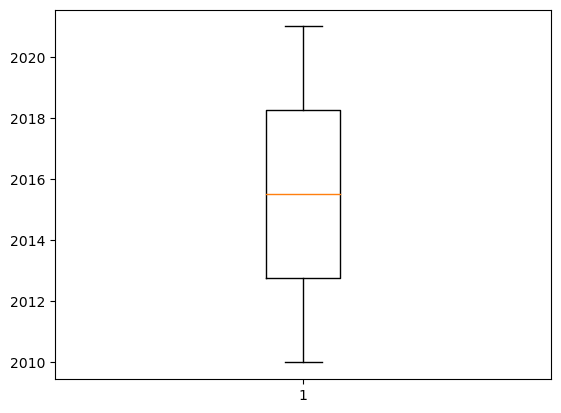

<Figure size 1000x600 with 0 Axes>

In [75]:
plt.boxplot(data["Year"]) #Aykırı değerler görmek için kullandık, dengede görünüyor
plt.figure(figsize=(10,6))
plt.show()

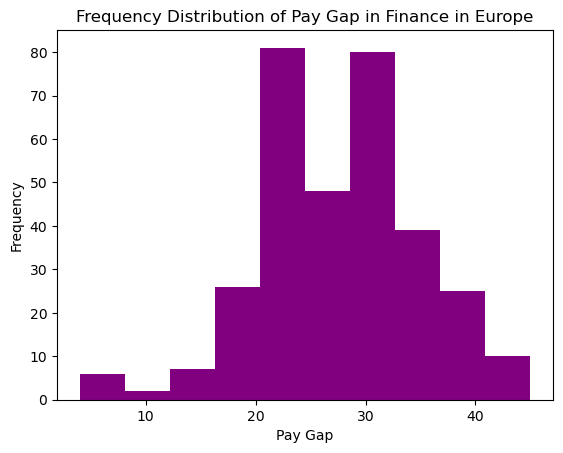

<Figure size 1000x600 with 0 Axes>

In [74]:
plt.hist(data["Financial"], color='purple') #"Financial" sütunundaki değerlerin frekans dağılımını görselleştirdik, Seaborn kullanmadan Matplot ile sayısal veriler üzerine çalışma imkanı gösterdik
plt.xlabel('Pay Gap')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Pay Gap in Finance in Europe')
plt.figure(figsize=(10,6))
plt.show()

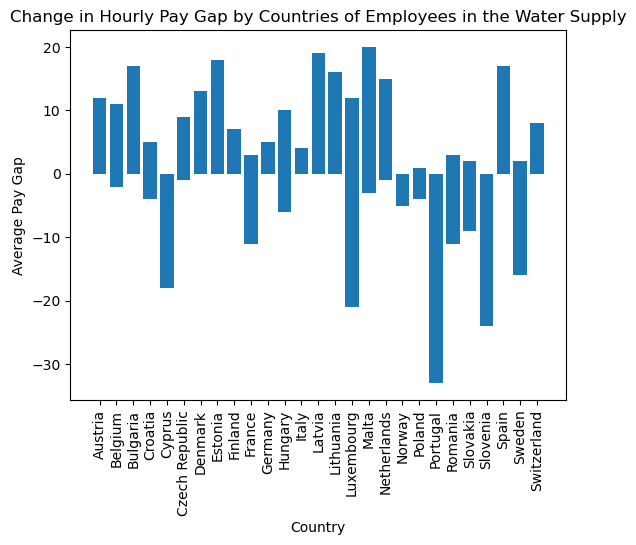

<Figure size 1000x600 with 0 Axes>

In [73]:
plt.bar(data["Country"],data["Water_supply"])
plt.title("Change in Hourly Pay Gap by Countries of Employees in the Water Supply") #Su Tedariği işinde çalışanların ülkelere göre saatlik maaş farkı değişimi
plt.xlabel('Country')
plt.ylabel('Average Pay Gap')
plt.xticks(rotation=90) # Yazılar birbirine karışmasın diye döndürdük
plt.figure(figsize=(10,6))
plt.show()

In [50]:
# İstenilen ülke ve meslek dalına göre, maaş farkı - yıl grafiğini veren fonksiyon
def country_plot(country_name, job_name ):  
      df_country = data[data["Country"] == country_name]
      plt.figure(figsize=(10,6)) #grafiğin boyutunu belirler
      sns.barplot(data = df_country, x ="Year", y = job_name )
      #başlıklar
      plt.xlabel('Year') 
      plt.ylabel('Average Pay Gap')
      plt.title(f"Pay Gap in {job_name} by years in {country_name}")

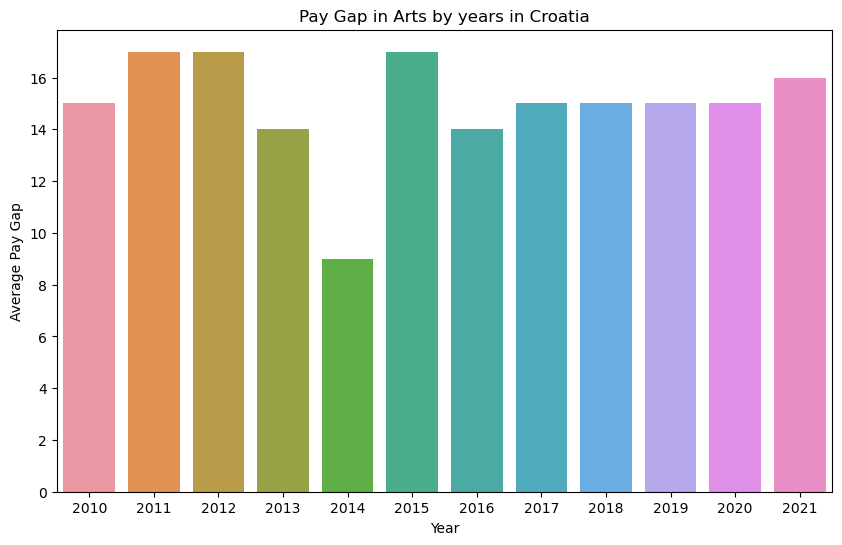

In [71]:
country_plot("Croatia","Arts")

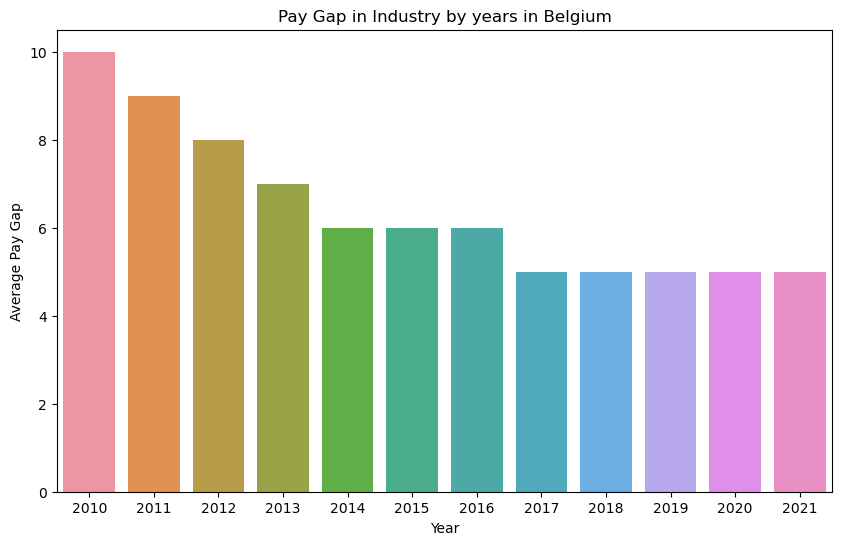

In [76]:
country_plot("Belgium","Industry")

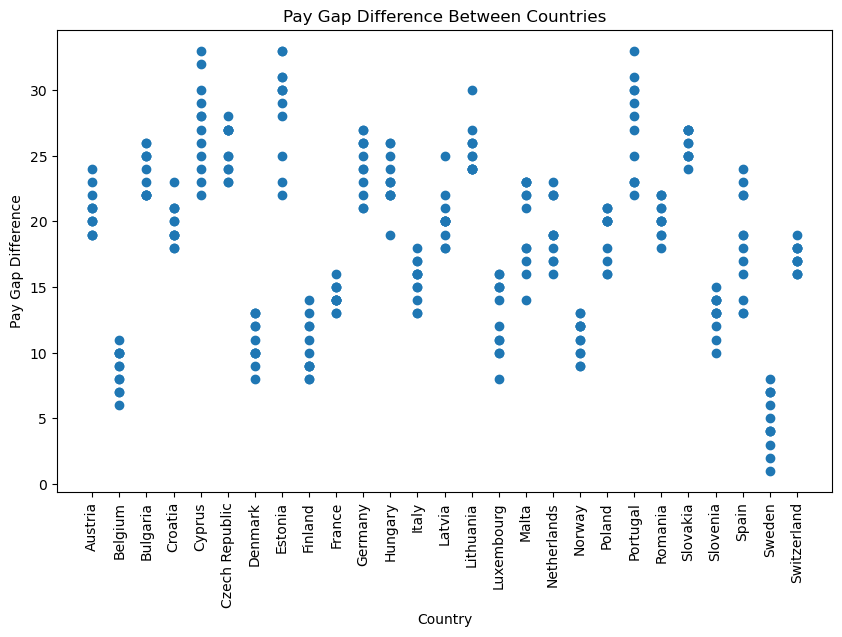

In [61]:
plt.figure(figsize=(10,6)) 

# Nokta grafiği oluşturma
plt.scatter(data.Country, data.Manufacturing)

plt.xlabel('Country')
plt.ylabel('Pay Gap Difference')
plt.xticks(rotation=90) 

plt.title('Pay Gap Difference Between Countries')

plt.show()

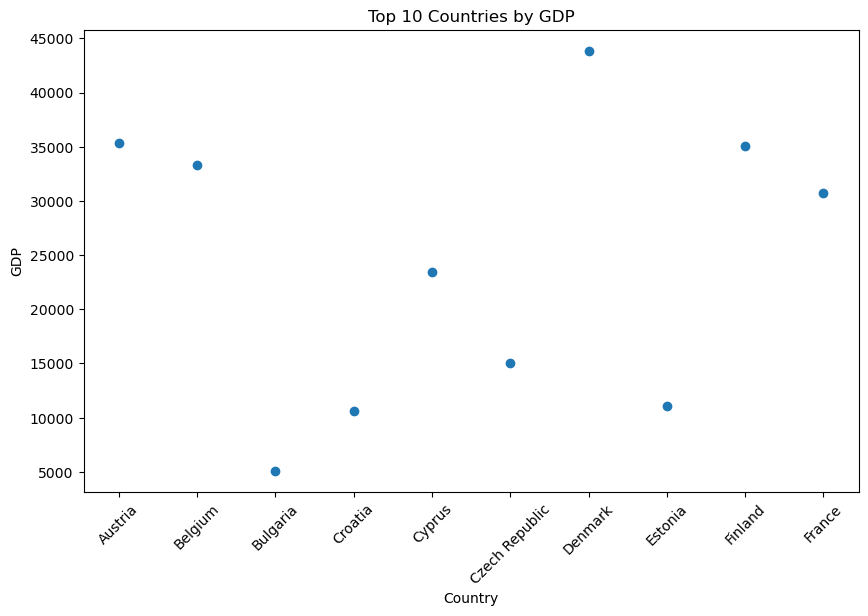

In [62]:
tablo = pd.pivot_table(data, values='GDP', index=['Country'], columns=['Year'])
tablo = tablo.reset_index()

# Veri eritme (melt) işlemi
tablo = pd.melt(tablo, id_vars=["Country"], var_name="Year", value_name="GDP")
tablo1 = tablo.head(10)

# Nokta grafiği oluşturma
plt.figure(figsize=(10,6))
plt.scatter(tablo1.Country,tablo1.GDP)
plt.xticks(rotation=45) # X eksenindeki etiketleri 45 derece çevirme
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('Top 10 Countries by GDP') 
plt.show()

In [63]:
# Seçilen mesleğe göre Ülke yıl bar grafiğini gösteren fonksiyon
def country_year_bar(job_name):
    fig = px.bar(data, x = "Country", y = "GDP" ,color= job_name)
    fig.show()
    plt.figure(figsize=(10,6))

In [78]:
country_year_bar("Education")

<Figure size 1000x600 with 0 Axes>

In [69]:
def group_and_print_line(column1, column2, mean_column): # İstediğimiz sütunlara göre gruplandırma yapıp buna göre istenilen diğer değerin ortalaması grafiğini döndüren fonksiyon 
    df = data.groupby([column1,column2])[[mean_column]].mean().reset_index() 
    fig = px.line(df, x = column1, y = mean_column, color = column2)
    fig.update_layout(template="plotly_dark")
    plt.figure(figsize=(10,6))
    fig.show()

In [70]:
group_and_print_line("Year","Country","Financial") # Finans alanına göre ortalaması alınmış, yıl ve ülkelere göre gruplanmış grafik

<Figure size 1000x600 with 0 Axes>

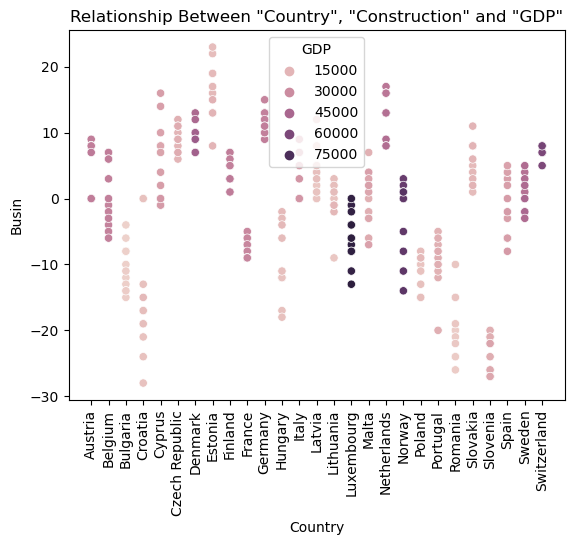

<Figure size 1000x600 with 0 Axes>

In [67]:
sns.scatterplot(x=data["Country"], y=data["Construction"], hue=data["GDP"])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Busin')
plt.title('Relationship Between "Country", "Construction" and "GDP"') 
plt.figure(figsize=(10,6))
plt.show()


#daha yüksek bir milli gelire sahip olan ülkelerin genellikle daha yüksek inşaat alanındaki maaş farkına sahip olduğunu gördük. GSYH, tüketim, yatırım, devlet harcamaları ve net ihracatın toplamından oluşur.

In [ ]:
data

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,Construction,Retail trade,Transportation,Accommodation,Information,Financial,Real estate,Professional_scientific,Administrative,Education,Human_health,Arts,Other
0,Austria,2010,35390,57,24,25,18,24,23,12,9,27,7,9,21,30,27,34,22,27,12,34,32
1,Austria,2011,36300,57,23,24,9,19,11,2,0,20,4,10,19,27,13,19,8,11,18,17,17
2,Austria,2012,36390,57,22,24,9,19,11,2,0,20,4,10,19,27,13,19,8,11,18,17,17
3,Austria,2013,36180,57,22,23,9,19,11,2,0,20,4,10,19,27,13,19,8,11,18,17,17
4,Austria,2014,36130,57,22,23,15,23,19,10,8,23,10,7,22,30,27,31,19,24,12,26,28
5,Austria,2015,36140,57,21,23,13,22,17,9,8,23,11,6,22,30,28,31,20,24,12,26,28
6,Austria,2016,36390,57,20,22,14,21,13,8,8,23,14,5,20,27,28,30,17,24,14,20,27
7,Austria,2017,36980,58,20,22,10,21,13,8,8,23,12,5,20,28,29,29,17,23,15,19,26
8,Austria,2018,37690,58,20,22,7,21,14,8,8,23,11,5,20,28,29,28,17,23,15,18,26
9,Austria,2019,38090,58,19,21,8,20,13,8,8,22,11,4,20,28,28,27,16,23,14,17,25
